<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Performance Python

In [1]:
import warnings
warnings.simplefilter('ignore')

## Loops

### Python

In [2]:
import random

In [3]:
def average_py(n):
    s = 0  
    for i in range(n):
        s += random.random()  
    return s / n  

In [4]:
n = 10000000  

In [5]:
%time average_py(n)  

CPU times: user 534 ms, sys: 5.82 ms, total: 540 ms
Wall time: 538 ms


0.499955992810787

In [6]:
%timeit average_py(n)  

531 ms ± 4.09 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%time sum([random.random() for _ in range(n)]) / n  

CPU times: user 544 ms, sys: 61.8 ms, total: 605 ms
Wall time: 607 ms


0.5000374357408551

### NumPy 

In [8]:
import numpy as np

In [9]:
def average_np(n):
    s = np.random.random(n)  
    return s.mean()  

In [10]:
%time average_np(n)

CPU times: user 36.6 ms, sys: 8.91 ms, total: 45.5 ms
Wall time: 44.4 ms


0.4999091362859967

In [11]:
%timeit average_np(n)

41.9 ms ± 569 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
s = np.random.random(n)
s.nbytes  

80000000

### Numba

In [13]:
import numba

In [14]:
average_nb = numba.jit(average_py, nopython=True)  

In [15]:
%time average_nb(n)  

CPU times: user 174 ms, sys: 19.8 ms, total: 194 ms
Wall time: 228 ms


0.49999644804300664

In [16]:
%time average_nb(n)  

CPU times: user 24.4 ms, sys: 567 µs, total: 24.9 ms
Wall time: 24.6 ms


0.5000159506415159

In [17]:
%timeit average_nb(n)  

23.6 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Cython

In [18]:
%load_ext Cython

In [19]:
%%cython -a
import random  
def average_cy1(int n):  
    cdef int i  
    cdef float s = 0  
    for i in range(n):
        s += random.random()
    return s / n

In [20]:
%time average_cy1(n)

CPU times: user 352 ms, sys: 3.64 ms, total: 356 ms
Wall time: 358 ms


0.5001948475837708

In [21]:
%timeit average_cy1(n)

352 ms ± 2.12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
%%cython
from libc.stdlib cimport rand  
cdef extern from 'limits.h':  
    int INT_MAX  
cdef int i
cdef float rn
for i in range(5):
    rn = rand() / INT_MAX  
    print(rn)

0.3835020661354065
0.5194163918495178
0.8309653401374817
0.03457210958003998
0.05346163362264633


In [23]:
%%cython -a
from libc.stdlib cimport rand  
cdef extern from 'limits.h':  
    int INT_MAX  
def average_cy2(int n):
    cdef int i
    cdef float s = 0
    for i in range(n):
        s += rand() / INT_MAX  
    return s / n

In [24]:
%time average_cy2(n)

CPU times: user 71.1 ms, sys: 1.01 ms, total: 72.1 ms
Wall time: 72.1 ms


0.500017523765564

In [25]:
%timeit average_cy2(n)

71.7 ms ± 390 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Prime Numbers

### Pure Python

In [26]:
def is_prime(I):
    if I % 2 == 0: return False  
    for i in range(3, int(I ** 0.5) + 1, 2):  
        if I % i == 0: return False  
    return True  

In [27]:
n = int(1e8 + 3)  
n

100000003

In [28]:
%time is_prime(n)

CPU times: user 13 µs, sys: 0 ns, total: 13 µs
Wall time: 15 µs


False

In [29]:
p1 = int(1e8 + 7)  
p1

100000007

In [30]:
%time is_prime(p1)

CPU times: user 154 µs, sys: 0 ns, total: 154 µs
Wall time: 156 µs


True

In [31]:
p2 = 100109100129162907  

In [32]:
p2.bit_length()  

57

In [33]:
%time is_prime(p2)

CPU times: user 6.67 s, sys: 30.5 ms, total: 6.7 s
Wall time: 6.7 s


True

### Numba

In [34]:
is_prime_nb = numba.jit(is_prime, nopython=True)

In [35]:
%time is_prime_nb(n)  

CPU times: user 40.6 ms, sys: 1.65 ms, total: 42.2 ms
Wall time: 41.6 ms


False

In [36]:
%time is_prime_nb(n)  

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 5.01 µs


False

In [37]:
%time is_prime_nb(p1)

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 8.11 µs


True

In [38]:
%time is_prime_nb(p2)  

CPU times: user 112 ms, sys: 1.29 ms, total: 113 ms
Wall time: 114 ms


True

### Cython

In [39]:
%%cython
def is_prime_cy1(I):
    if I % 2 == 0: return False
    for i in range(3, int(I ** 0.5) + 1, 2):
        if I % i == 0: return False
    return True

In [40]:
%timeit is_prime(p1)

141 µs ± 734 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [41]:
%timeit is_prime_cy1(p1)

89.7 µs ± 141 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [42]:
%%cython
def is_prime_cy2(long I):  
    cdef long i  
    if I % 2 == 0: return False
    for i in range(3, int(I ** 0.5) + 1, 2):
        if I % i == 0: return False
    return True

In [43]:
%timeit is_prime_cy2(p1)

4.7 µs ± 3.55 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [44]:
%time is_prime_nb(p2)

CPU times: user 112 ms, sys: 1.03 ms, total: 113 ms
Wall time: 112 ms


True

In [45]:
%time is_prime_cy2(p2)

CPU times: user 146 ms, sys: 1.02 ms, total: 147 ms
Wall time: 146 ms


True

### Multiprocessing

In [46]:
import multiprocessing as mp

In [47]:
# pool = mp.Pool(processes=4)  

<b style="color: red;">This currently does not work on Macs with Apple Silicon.</b>

In [48]:
# %time pool.map(is_prime, 10 * [p1])  

In [49]:
# %time pool.map(is_prime_nb, 10 * [p2])  

In [50]:
# %time pool.map(is_prime_cy2, 10 * [p2])  

## Fibonacci Numbers

### Recursive Algorithm

In [51]:
from numba import njit

In [52]:
def fib_rec_py1(n):
    if n < 2:
        return n
    else:
        return fib_rec_py1(n - 1) + fib_rec_py1(n - 2)

In [53]:
%time fib_rec_py1(35)

CPU times: user 1.76 s, sys: 5.83 ms, total: 1.76 s
Wall time: 1.76 s


9227465

In [54]:
@njit
def fib_rec_nb(n):
    if n < 2:
        return n
    else:
        return fib_rec_nb(n - 1) + fib_rec_nb(n - 2)

In [55]:
%time fib_rec_nb(35)

CPU times: user 73.7 ms, sys: 1.66 ms, total: 75.3 ms
Wall time: 88.3 ms


9227465

In [56]:
%time fib_rec_nb(35)

CPU times: user 40.2 ms, sys: 327 µs, total: 40.5 ms
Wall time: 40.6 ms


9227465

In [57]:
%%cython
def fib_rec_cy(int n):
    if n < 2:
        return n
    else:
        return fib_rec_cy(n - 1) + fib_rec_cy(n - 2)

In [58]:
%time fib_rec_cy(35)

CPU times: user 427 ms, sys: 3.42 ms, total: 430 ms
Wall time: 429 ms


9227465

In [59]:
from functools import lru_cache as cache

In [60]:
@cache(maxsize=None)  
def fib_rec_py2(n):
    if n < 2:
        return n
    else:
        return fib_rec_py2(n - 1) + fib_rec_py2(n - 2)

In [61]:
%time fib_rec_py2(35)  

CPU times: user 11 µs, sys: 1 µs, total: 12 µs
Wall time: 11.9 µs


9227465

In [62]:
%time fib_rec_py2(80)  

CPU times: user 12 µs, sys: 0 ns, total: 12 µs
Wall time: 13.1 µs


23416728348467685

### Iterative Algorithm 

In [63]:
def fib_it_py(n):
    x, y = 0, 1
    for i in range(1, n + 1):
        x, y = y, x + y
    return x

In [64]:
%time fib_it_py(80)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 6.2 µs


23416728348467685

In [65]:
fib_it_nb = numba.jit(fib_it_py)

In [66]:
%time fib_it_nb(80)

CPU times: user 29.7 ms, sys: 1.57 ms, total: 31.2 ms
Wall time: 31.9 ms


23416728348467685

In [67]:
%time fib_it_nb(80)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


23416728348467685

In [68]:
%%cython
def fib_it_cy1(int n):
    cdef long i
    cdef long x = 0, y = 1
    for i in range(1, n + 1):
        x, y = y, x + y
    return x

In [69]:
%time fib_it_cy1(80)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 2.62 µs


23416728348467685

In [70]:
%%time
fn = fib_rec_py2(150)  
print(fn)  

9969216677189303386214405760200
CPU times: user 46 µs, sys: 4 µs, total: 50 µs
Wall time: 49.8 µs


In [71]:
fn.bit_length()  

103

In [72]:
%%time 
fn = fib_it_nb(150)  
print(fn)  

6792540214324356296
CPU times: user 96 µs, sys: 40 µs, total: 136 µs
Wall time: 130 µs


In [73]:
fn.bit_length()  

63

In [74]:
%%time
fn = fib_it_cy1(150)  
print(fn)  

6792540214324356296
CPU times: user 150 µs, sys: 94 µs, total: 244 µs
Wall time: 223 µs


In [75]:
fn.bit_length()  

63

In [76]:
%%cython
cdef extern from *:
    ctypedef int int128 '__int128_t'  
def fib_it_cy2(int n):
    cdef int128 i  
    cdef int128 x = 0, y = 1  
    for i in range(1, n + 1):
        x, y = y, x + y
    return x

In [77]:
%%time
fn = fib_it_cy2(150)  
print(fn)  

9969216677189303386214405760200
CPU times: user 22 µs, sys: 3 µs, total: 25 µs
Wall time: 28.1 µs


In [78]:
fn.bit_length()  

103

## The Number Pi

The code example is taken from [StackExchange](https://codereview.stackexchange.com/questions/69370/monte-carlo-pi-calculation).

In [79]:
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_format = 'svg'

In [80]:
rn = [(random.random() * 2 - 1, random.random() * 2 - 1)
      for _ in range(500)]

In [81]:
rn = np.array(rn)
rn[:5]

array([[-0.74105495,  0.21659404],
       [ 0.29533552,  0.27454952],
       [-0.90091177, -0.06116347],
       [ 0.22191044,  0.65726317],
       [-0.65071162,  0.26046397]])

(-1.1, 1.1)

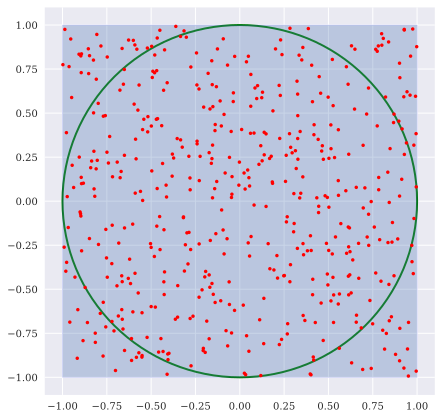

In [82]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)
circ = plt.Circle((0, 0), radius=1, edgecolor='g', lw=2.0,
                  facecolor='None')  
box = plt.Rectangle((-1, -1), 2, 2, edgecolor='b', alpha=0.3)  
ax.add_patch(circ)  
ax.add_patch(box)  
plt.plot(rn[:, 0], rn[:, 1], 'r.')  
plt.ylim(-1.1, 1.1)
plt.xlim(-1.1, 1.1)
# plt.savefig('../../images/ch10/perf_01.png');

In [83]:
n = int(1e7)

In [84]:
%time rn = np.random.random((n, 2)) * 2 - 1

CPU times: user 81.8 ms, sys: 15.6 ms, total: 97.3 ms
Wall time: 110 ms


In [85]:
rn.nbytes

160000000

In [86]:
%time distance = np.sqrt((rn ** 2).sum(axis=1))  
distance[:8].round(3)

CPU times: user 72.8 ms, sys: 46.5 ms, total: 119 ms
Wall time: 134 ms


array([0.429, 0.894, 0.904, 0.651, 1.076, 0.301, 1.011, 0.402])

In [87]:
%time frac = (distance <= 1.0).sum() / len(distance)  

CPU times: user 5.7 ms, sys: 2.59 ms, total: 8.29 ms
Wall time: 7.08 ms


In [88]:
pi_mcs = frac * 4  
pi_mcs  

3.1422068

In [89]:
def mcs_pi_py(n):
    circle = 0
    for _ in range(n):
        x, y = random.random(), random.random()
        if (x ** 2 + y ** 2) ** 0.5 <= 1:
            circle += 1
    return (4 * circle) / n

In [90]:
%time mcs_pi_py(n)

CPU times: user 2.09 s, sys: 6.1 ms, total: 2.1 s
Wall time: 2.1 s


3.141862

In [91]:
mcs_pi_nb = numba.jit(mcs_pi_py)

In [92]:
%time mcs_pi_nb(n)

CPU times: user 179 ms, sys: 5.51 ms, total: 185 ms
Wall time: 187 ms


3.1419856

In [93]:
%time mcs_pi_nb(n)

CPU times: user 47.4 ms, sys: 508 µs, total: 47.9 ms
Wall time: 48 ms


3.141478

In [94]:
%%cython -a
import random
def mcs_pi_cy1(int n):
    cdef int i, circle = 0
    cdef float x, y, z
    for i in range(n):
        x, y = random.random(), random.random()
        z = (x ** 2 + y ** 2) ** 0.5
        if z <= 1:
            circle += 1
    return (4 * circle) / n

In [95]:
%time mcs_pi_cy1(n)

CPU times: user 518 ms, sys: 4.33 ms, total: 522 ms
Wall time: 522 ms


3.141308

In [96]:
%%cython -a
from libc.stdlib cimport rand
cdef extern from 'limits.h':
    int INT_MAX
def mcs_pi_cy2(int n):
    cdef int i, circle = 0
    cdef float x, y, z
    for i in range(n):
        x, y = rand() / INT_MAX, rand() / INT_MAX
        z = (x ** 2 + y ** 2) ** 0.5
        if z <= 1:
            circle += 1
    return (4 * circle) / n

In [97]:
%time mcs_pi_cy2(n)

CPU times: user 141 ms, sys: 482 µs, total: 142 ms
Wall time: 141 ms


3.1419388

## Binomial Trees

### Python

In [98]:
import math

In [99]:
S0 = 36.  
T = 1.0  
r = 0.06  
sigma = 0.2  

In [100]:
def simulate_tree(M):
    dt = T / M  
    u = math.exp(sigma * math.sqrt(dt))  
    d = 1 / u  
    S = np.zeros((M + 1, M + 1))
    S[0, 0] = S0
    z = 1
    for t in range(1, M + 1):
        for i in range(z):
            S[i, t] = S[i, t-1] * u
            S[i+1, t] = S[i, t-1] * d
        z += 1
    return S

In [101]:
np.set_printoptions(formatter={'float':
                               lambda x: '%6.2f' % x})  

In [102]:
simulate_tree(4)  

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [  0.00,  32.57,  36.00,  39.79,  43.97],
       [  0.00,   0.00,  29.47,  32.57,  36.00],
       [  0.00,   0.00,   0.00,  26.67,  29.47],
       [  0.00,   0.00,   0.00,   0.00,  24.13]])

In [103]:
%time simulate_tree(500)  

CPU times: user 45.1 ms, sys: 2.09 ms, total: 47.2 ms
Wall time: 62.2 ms


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [  0.00,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [  0.00,   0.00,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.41]])

### NumPy

In [104]:
M = 4

In [105]:
up = np.arange(M + 1)
up = np.resize(up, (M + 1, M + 1))  
up

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [106]:
down = up.T * 2  
down

array([[0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [4, 4, 4, 4, 4],
       [6, 6, 6, 6, 6],
       [8, 8, 8, 8, 8]])

In [107]:
up - down  

array([[ 0,  1,  2,  3,  4],
       [-2, -1,  0,  1,  2],
       [-4, -3, -2, -1,  0],
       [-6, -5, -4, -3, -2],
       [-8, -7, -6, -5, -4]])

In [108]:
dt = T / M

In [109]:
S0 * np.exp(sigma * math.sqrt(dt) * (up - down))  

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [ 29.47,  32.57,  36.00,  39.79,  43.97],
       [ 24.13,  26.67,  29.47,  32.57,  36.00],
       [ 19.76,  21.84,  24.13,  26.67,  29.47],
       [ 16.18,  17.88,  19.76,  21.84,  24.13]])

In [110]:
def simulate_tree_np(M):
    dt = T / M
    up = np.arange(M + 1)
    up = np.resize(up, (M + 1, M + 1))
    down = up.transpose() * 2
    S = S0 * np.exp(sigma * math.sqrt(dt) * (up - down))
    return S

In [111]:
simulate_tree_np(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [ 29.47,  32.57,  36.00,  39.79,  43.97],
       [ 24.13,  26.67,  29.47,  32.57,  36.00],
       [ 19.76,  21.84,  24.13,  26.67,  29.47],
       [ 16.18,  17.88,  19.76,  21.84,  24.13]])

In [112]:
%time simulate_tree_np(500)

CPU times: user 1.99 ms, sys: 1.77 ms, total: 3.76 ms
Wall time: 4.19 ms


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [ 35.36,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [ 34.73,  35.05,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.41,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.40,   0.41,   0.41]])

### Numba

In [113]:
simulate_tree_nb = numba.jit(simulate_tree)

In [114]:
simulate_tree_nb(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [  0.00,  32.57,  36.00,  39.79,  43.97],
       [  0.00,   0.00,  29.47,  32.57,  36.00],
       [  0.00,   0.00,   0.00,  26.67,  29.47],
       [  0.00,   0.00,   0.00,   0.00,  24.13]])

In [115]:
%time simulate_tree_nb(500)

CPU times: user 100 µs, sys: 156 µs, total: 256 µs
Wall time: 257 µs


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [  0.00,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [  0.00,   0.00,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.41]])

In [116]:
%timeit simulate_tree_nb(500)

94.6 µs ± 22.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Cython

In [117]:
%%cython -a
import numpy as np
cimport cython
from libc.math cimport exp, sqrt
cdef float S0 = 36.
cdef float T = 1.0
cdef float r = 0.06
cdef float sigma = 0.2
def simulate_tree_cy(int M):
    cdef int z, t, i
    cdef float dt, u, d
    cdef float[:, :] S = np.zeros((M + 1, M + 1),
                                  dtype=np.float32)  
    dt = T / M
    u = exp(sigma * sqrt(dt))
    d = 1 / u
    S[0, 0] = S0
    z = 1
    for t in range(1, M + 1):
        for i in range(z):
            S[i, t] = S[i, t-1] * u
            S[i+1, t] = S[i, t-1] * d
        z += 1
    return np.array(S)

In [118]:
simulate_tree_cy(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [  0.00,  32.57,  36.00,  39.79,  43.97],
       [  0.00,   0.00,  29.47,  32.57,  36.00],
       [  0.00,   0.00,   0.00,  26.67,  29.47],
       [  0.00,   0.00,   0.00,   0.00,  24.13]], dtype=float32)

In [119]:
%time simulate_tree_cy(500)

CPU times: user 364 µs, sys: 498 µs, total: 862 µs
Wall time: 419 µs


array([[ 36.00,  36.32,  36.65, ..., 3095.77, 3123.59, 3151.65],
       [  0.00,  35.68,  36.00, ..., 3040.89, 3068.21, 3095.77],
       [  0.00,   0.00,  35.36, ..., 2986.97, 3013.81, 3040.89],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.41]],
      dtype=float32)

In [120]:
%timeit S = simulate_tree_cy(500)

90.9 µs ± 4.29 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Monte Carlo Simulation

### Python

In [121]:
M = 100  
I = 50000  

In [122]:
def mcs_simulation_py(p):
    M, I = p
    dt = T / M
    S = np.zeros((M + 1, I))
    S[0] = S0
    rn = np.random.standard_normal(S.shape)  
    for t in range(1, M + 1):  
        for i in range(I):  
            S[t, i] = S[t-1, i] * math.exp((r - sigma ** 2 / 2) * dt +
                                         sigma * math.sqrt(dt) * rn[t, i])  
    return S      

In [123]:
%time S = mcs_simulation_py((M, I))

CPU times: user 2.45 s, sys: 19.9 ms, total: 2.47 s
Wall time: 2.46 s


In [124]:
S[-1].mean()  

38.24081388898043

In [125]:
S0 * math.exp(r * T)  

38.22611567563295

In [126]:
K = 40.  

In [127]:
C0 = math.exp(-r * T) * np.maximum(K - S[-1], 0).mean()  

In [128]:
C0

3.837586914897828

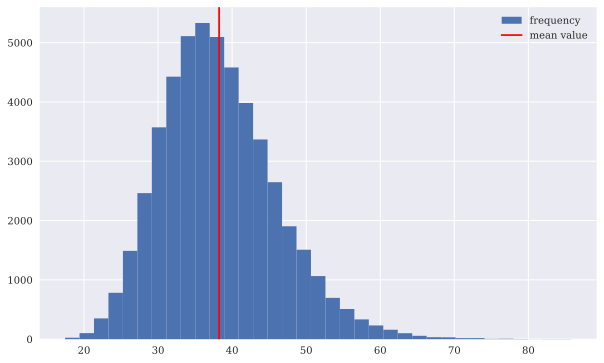

In [129]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=35, label='frequency')
plt.axvline(S[-1].mean(), color='r', label='mean value')
plt.legend(loc=0)

### NumPy

In [130]:
def mcs_simulation_np(p):
    M, I = p
    dt = T / M
    S = np.zeros((M + 1, I))
    S[0] = S0
    rn = np.random.standard_normal(S.shape)
    for t in range(1, M + 1):  
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt +
                               sigma * math.sqrt(dt) * rn[t]) 
    return S      

In [131]:
%time S = mcs_simulation_np((M, I))

CPU times: user 108 ms, sys: 13.8 ms, total: 122 ms
Wall time: 125 ms


In [132]:
S[-1].mean()

38.157311718296555

In [133]:
%timeit S = mcs_simulation_np((M, I))

109 ms ± 513 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Numba 

In [134]:
mcs_simulation_nb = numba.jit(mcs_simulation_py)

In [135]:
%time S = mcs_simulation_nb((M, I))  

CPU times: user 317 ms, sys: 12 ms, total: 329 ms
Wall time: 328 ms


In [136]:
%time S = mcs_simulation_nb((M, I))  

CPU times: user 111 ms, sys: 6.21 ms, total: 117 ms
Wall time: 117 ms


In [137]:
S[-1].mean()

38.25844889642977

In [138]:
C0 = math.exp(-r * T) * np.maximum(K - S[-1], 0).mean()

In [139]:
C0

3.839565952569393

In [140]:
%timeit S = mcs_simulation_nb((M, I))  

114 ms ± 222 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Cython &mdash; Sequential

In [141]:
%%cython
import numpy as np
cimport numpy as np
cimport cython
from libc.math cimport exp, sqrt
cdef float S0 = 36.
cdef float T = 1.0
cdef float r = 0.06
cdef float sigma = 0.2
@cython.boundscheck(False)
@cython.wraparound(False)
def mcs_simulation_cy(p):
    cdef int M, I
    M, I = p
    cdef int t, i
    cdef float dt = T / M
    cdef double[:, :] S = np.zeros((M + 1, I))
    cdef double[:, :] rn = np.random.standard_normal((M + 1, I))
    S[0] = S0
    for t in range(1, M + 1):
        for i in range(I):
            S[t, i] = S[t-1, i] * exp((r - sigma ** 2 / 2) * dt +
                                         sigma * sqrt(dt) * rn[t, i])
    return np.array(S) 

In [142]:
%time S = mcs_simulation_cy((M, I))

CPU times: user 109 ms, sys: 10.9 ms, total: 120 ms
Wall time: 118 ms


In [143]:
S[-1].mean()

38.235224280263466

In [144]:
%timeit S = mcs_simulation_cy((M, I))

115 ms ± 415 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Multiprocessing

In [145]:
import multiprocessing as mp

In [146]:
pool = mp.Pool(processes=4)  

In [147]:
p = 20  

<b style="color: red;">This currently does not work on Macs with Apple Silicon.</b>

In [148]:
# %timeit S = np.hstack(pool.map(mcs_simulation_np, p * [(M, int(I / p))]))

In [149]:
# %timeit S = np.hstack(pool.map(mcs_simulation_nb, p * [(M, int(I / p))]))

In [150]:
# %timeit S = np.hstack(pool.map(mcs_simulation_cy, p * [(M, int(I / p))]))

## Recursive pandas Algorithm

### Data and Formula

In [151]:
import numba
import numpy as np
import pandas as pd

In [152]:
sym = 'SPY'

In [153]:
data = pd.DataFrame(pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                               index_col=0, parse_dates=True)[sym]).dropna()

In [154]:
alpha = 0.25

In [155]:
data['EWMA'] = data[sym]  

In [156]:
%%time
for t in zip(data.index, data.index[1:]):
    data.loc[t[1], 'EWMA'] = (alpha * data.loc[t[1], sym] +
                              (1 - alpha) * data.loc[t[0], 'EWMA'])  

CPU times: user 139 ms, sys: 2.66 ms, total: 141 ms
Wall time: 141 ms


In [157]:
data.head()

,SPY,EWMA
Date,,
2010-01-04,113.33,113.330000
2010-01-05,113.63,113.405000
2010-01-06,113.71,113.481250
2010-01-07,114.19,113.658438
2010-01-08,114.57,113.886328


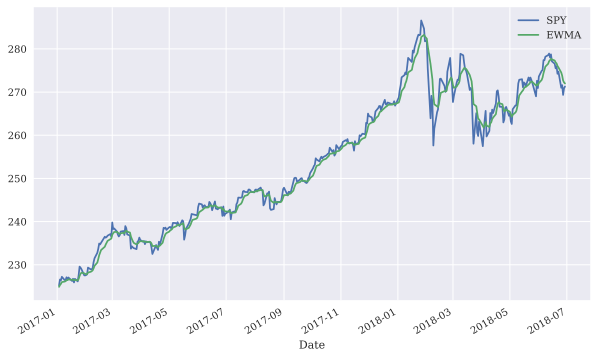

In [158]:
data[data.index > '2017-1-1'].plot(figsize=(10, 6));

### Pure Python

In [159]:
def ewma_py(x, alpha):
    y = np.zeros_like(x)
    y[0] = x[0]
    for i in range(1, len(x)):
        y[i] = alpha * x[i] + (1-alpha) * y[i-1]
    return y

In [160]:
%time data['EWMA_PY'] = ewma_py(data[sym], alpha)  

CPU times: user 12.6 ms, sys: 390 µs, total: 13 ms
Wall time: 12.7 ms


In [161]:
%time data['EWMA_PY'] = ewma_py(data[sym].values, alpha)  

CPU times: user 628 µs, sys: 30 µs, total: 658 µs
Wall time: 644 µs


### Numba

In [162]:
ewma_nb = numba.jit(ewma_py)

In [163]:
%time data['EWMA_NB'] = ewma_nb(data[sym].values, alpha)  

CPU times: user 94.3 ms, sys: 3.48 ms, total: 97.8 ms
Wall time: 96.9 ms


In [164]:
%timeit data['EWMA_NB'] = ewma_nb(data[sym].values, alpha)  

27.2 µs ± 94.3 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Cython

In [165]:
%%cython
import numpy as np
cimport cython
@cython.boundscheck(False)
@cython.wraparound(False)
def ewma_cy(double[:] x, float alpha):
    cdef int i
    cdef double[:] y = np.empty_like(x)
    y[0] = x[0]
    for i in range(1, len(x)):
        y[i] = alpha * x[i] + (1 - alpha) * y[i - 1]
    return y

In [166]:
%time data['EWMA_CY'] = ewma_cy(data[sym].values, alpha)

CPU times: user 418 µs, sys: 237 µs, total: 655 µs
Wall time: 680 µs


In [167]:
%timeit data['EWMA_CY'] = ewma_cy(data[sym].values, alpha)

48.2 µs ± 2.3 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [168]:
data.head()

,SPY,EWMA,EWMA_PY,EWMA_NB,EWMA_CY
Date,,,,,
2010-01-04,113.33,113.330000,113.330000,113.330000,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2010-01-05,113.63,113.405000,113.405000,113.405000,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2010-01-06,113.71,113.481250,113.481250,113.481250,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2010-01-07,114.19,113.658438,113.658438,113.658438,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2010-01-08,114.57,113.886328,113.886328,113.886328,"[113.33, 113.405, 113.48125, 113.6584375, 113...."


In [169]:
data.tail()

,SPY,EWMA,EWMA_PY,EWMA_NB,EWMA_CY
Date,,,,,
2018-06-25,271.00,274.535176,274.535176,274.535176,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2018-06-26,271.60,273.801382,273.801382,273.801382,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2018-06-27,269.35,272.688537,272.688537,272.688537,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2018-06-28,270.89,272.238903,272.238903,272.238903,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2018-06-29,271.28,271.999177,271.999177,271.999177,"[113.33, 113.405, 113.48125, 113.6584375, 113...."


<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>